In the last lecture, we made us of the tools available through `scikit-learn` in order to classify handwritten digits. While these basic classifiers can be used to handle image datasets, there is an algorithm that is tailor-made for image datasets known as convolutional neural networks.

Reference:

https://towardsdatascience.com/building-a-convolutional-neural-network-cnn-in-keras-329fbbadc5f5
https://towardsdatascience.com/simple-introduction-to-convolutional-neural-networks-cdf8d3077bac
https://ujjwalkarn.me/2016/08/11/intuitive-explanation-convnets/

In this example, we will try something a little harder: color images of .

In [1]:
from keras.datasets import cifar10

Using TensorFlow backend.


Similar to our previous example, we will split the data into test and training datasets:

In [3]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

Before doing any machine learning, let's take a look at what we're dealing with.

In [4]:
import matplotlib.pyplot as plt
import numpy as np

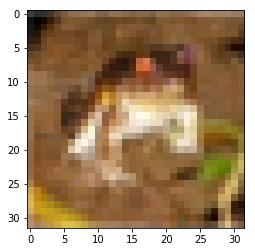

In [5]:
plt.imshow(X_train[0])

This dataset has ten classes of objects. See if you can figure out what each class corresponds to.

We found:

0. Planes
1. Cars
2. Birds
3. Cats
4. Deer
5. Dogs
6. Frogs
7. Horses
8. Boats
9. Trucks

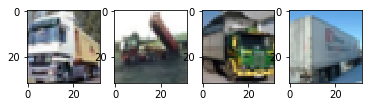

In [6]:
test = np.where(y_train == 9)
test = test[0][0:4]

fig, axes = plt.subplots(1, 4)

for ax, ti in zip(axes, test):
    ax.imshow(X_train[ti])

Before we can train the CNN, we need to check the shape of our dataset. In this case, we will not flatten the objects like we did previously. Let's check the shape of a single object in the test dataset. Keras expects as input (number of samples, dimension 1, dimension 2, colors).

In [ ]:
X_train.shape

The other thing different about Keras is that the target variable must be encoded in a binary representation. Instead of having 10 integers represent each category, a 1 in the first column will represent 0, a 1 in the second column will represent 1, etc.

In [7]:
from keras.utils import to_categorical

In [8]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [9]:
y_train[0]

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.], dtype=float32)

Now we are ready to build a CNN model.

In [10]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D, Activation

# Create model
model = Sequential()

# Add layers to model
model.add(Conv2D(32, kernel_size=(3,3), padding='same', input_shape=(32,32,3)))
model.add(Activation('relu'))
model.add(Conv2D(32, (3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3,3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(10))
model.add(Activation('softmax'))

opt = keras.optimizers.RMSprop(lr=0.0001, decay=1e-6)

# Compile model
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

X_train /= 255
X_test /= 255

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [11]:
# Train the model
model.fit(X_train, y_train, batch_size=32, epochs=100,
          validation_data=(X_test, y_test), shuffle=True)

Instructions for updating:
Use tf.cast instead.
Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 357s 7ms/step - loss: 1.8244 - acc: 0.3315 - val_loss: 1.6553 - val_acc: 0.3897
Epoch 2/100
50000/50000 [==============================] - 332s 7ms/step - loss: 1.5101 - acc: 0.4526 - val_loss: 1.4177 - val_acc: 0.4924
Epoch 3/100
50000/50000 [==============================] - 312s 6ms/step - loss: 1.3775 - acc: 0.5058 - val_loss: 1.2444 - val_acc: 0.5602
Epoch 4/100
50000/50000 [==============================] - 308s 6ms/step - loss: 1.2803 - acc: 0.5420 - val_loss: 1.1794 - val_acc: 0.5812
Epoch 5/100
50000/50000 [==============================] - 337s 7ms/step - loss: 1.2012 - acc: 0.5733 - val_loss: 1.1608 - val_acc: 0.5887
Epoch 6/100
50000/50000 [==============================] - 319s 6ms/step - loss: 1.1341 - acc: 0.6005 - val_loss: 1.0829 - val_acc: 0.6153
Epoch 7/100
50000/50000 [==============================] - 311s 6ms/

50000/50000 [==============================] - 273s 5ms/step - loss: 0.6354 - acc: 0.7895 - val_loss: 0.6569 - val_acc: 0.7811
Epoch 58/100
50000/50000 [==============================] - 273s 5ms/step - loss: 0.6340 - acc: 0.7891 - val_loss: 0.6478 - val_acc: 0.7864
Epoch 59/100
50000/50000 [==============================] - 274s 5ms/step - loss: 0.6318 - acc: 0.7891 - val_loss: 0.6801 - val_acc: 0.7823
Epoch 60/100
50000/50000 [==============================] - 274s 5ms/step - loss: 0.6321 - acc: 0.7895 - val_loss: 0.6633 - val_acc: 0.7802
Epoch 61/100
50000/50000 [==============================] - 275s 5ms/step - loss: 0.6270 - acc: 0.7914 - val_loss: 0.6313 - val_acc: 0.7928
Epoch 62/100
50000/50000 [==============================] - 276s 6ms/step - loss: 0.6258 - acc: 0.7901 - val_loss: 0.7088 - val_acc: 0.7702
Epoch 63/100
50000/50000 [==============================] - 273s 5ms/step - loss: 0.6243 - acc: 0.7909 - val_loss: 0.6449 - val_acc: 0.7889
Epoch 64/100
50000/50000 [=======

In [13]:
model.save('test_model.h5')

In [14]:
test_model = keras.models.load_model('test_model.h5')

In [15]:
test_model.predict(X_test[0])

ValueError: Error when checking input: expected conv2d_1_input to have 4 dimensions, but got array with shape (32, 32, 3)

In [27]:
test_p = model.predict(X_test)

3

1


(-0.5, 31.5, 31.5, -0.5)

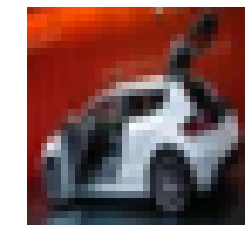

In [34]:
n = 6
print(np.argmax(test_p[n, :]))
plt.imshow(X_test[n, :, :, :])
plt.axis('off')

(6, 32, 32, 3)